In [1]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


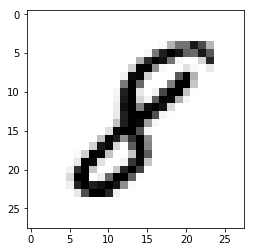

In [3]:
import matplotlib.pyplot as plt
#%matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(Y_train[image_index]) # The label is 8
plt.imshow(X_train[image_index], cmap='Greys')

In [4]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

X_train = X_train/255
X_test = X_test/255

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.models import Model

In [0]:
def MNIST(input_shape):
    
    
    X_input = Input(input_shape)
    
    X = Conv2D(28, (3, 3), strides = (1, 1), name = 'conv0')(X_input)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(128, activation='relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(10,activation = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='MNIST')
    
    return model
    
    
    
    return model

In [9]:
Model = MNIST(X_train.shape[1:])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
Model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
Model.fit(x=X_train,y=Y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.2035 - acc: 0.9400
Epoch 2/10
60000/60000 [==============================] - 42s 700us/step - loss: 0.0783 - acc: 0.9762
Epoch 3/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0543 - acc: 0.9830
Epoch 4/10
60000/60000 [==============================] - 40s 663us/step - loss: 0.0413 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0342 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 39s 653us/step - loss: 0.0271 - acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.0232 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.0206 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0197 - acc: 0.9932
Epoch 10/10
60000/60000 [=========

In [11]:
Model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 2s 224us/step


[0.0718872348110297, 0.9844]

8


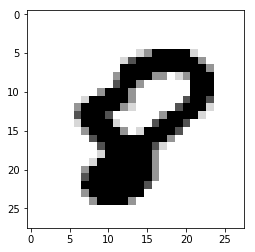

In [15]:
image_index = 4455
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = Model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())